In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from random import gauss
from scipy import stats
import seaborn as sns

## Multiple Linear Regression

The main idea here is pretty simple. Whereas, in simple linear regression we took our dependent variable to be a function only of a single independent variable, here we'll be taking the dependent variable to be a function of multiple independent variables.

Our regression equation, then, instead of looking like $\hat{y} = mx + b$, will now look like:

$\hat{y} = \hat{\beta}_0 + \hat{\beta}_1x_1 + ... + \hat{\beta}_nx_n$.

Remember that the hats ( $\hat{}$ ) indicate parameters that are estimated.

Is this still a best-fit *line*? Well, no. What does the graph of, say, z = x + y look like? [Here's](https://academo.org/demos/3d-surface-plotter/) a 3d-plotter. (Of course, once we get x's with subscripts beyond 2 it's going to be very hard to visualize. But in practice linear regressions can make use of dozens or even of hundreds of independent variables!)

I want to focus here more on what coding a multiple regression looks like in Python. But you might be wondering: Is it possible to calculate the betas by hand?

Yes! See [here](https://stattrek.com/multiple-regression/regression-coefficients.aspx) for a nice explanation and example.

We'll focus more directly on matrix mathematics later in the course.

## Confounding Variables

Suppose I have a simple linear regression that models the growth of corn plants as a function of the temperature of the ambient air. And suppose there is a noticeable positive correlation between temperature and plant height.

In [2]:
corn = pd.read_csv('data/corn.csv')

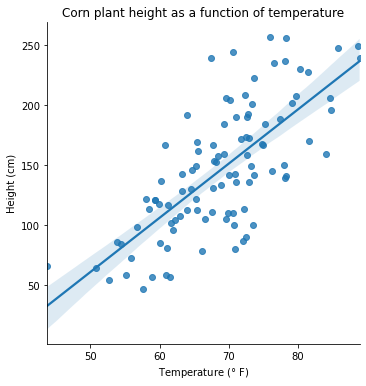

In [3]:
sns.lmplot(data=corn, x='temp', y='height')
plt.xlabel('Temperature ($\degree$ F)')
plt.ylabel('Height (cm)')
plt.title('Corn plant height as a function of temperature');

In [4]:
corn.head()

,Unnamed: 0,temp,humid,height
0,0,58.086965,49.848304,122.222368
1,1,70.582087,22.855446,110.079666
2,2,75.868571,72.856834,256.812528
3,3,74.732376,38.907566,167.889601
4,4,77.384666,42.570524,188.914312


It seems that higher temperatures lead to taller corn plants. But it's hard to know for sure. One **confounding variable** might be *humidity*. If we haven't controlled for humidity, then it's difficult to draw conclusions.

One solution is to use **both features** in a single model.

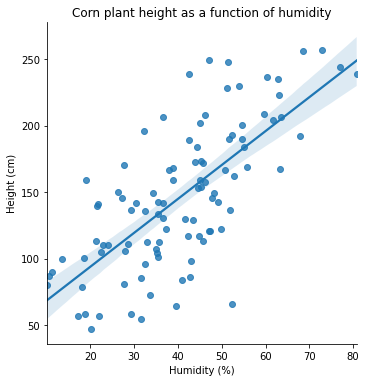

In [5]:
sns.lmplot(data=corn, x='humid', y='height')
plt.xlabel('Humidity (%)')
plt.ylabel('Height (cm)')
plt.title('Corn plant height as a function of humidity');

# Assumptions of Multiple Linear Regression

Multipe Linear Regession has the same assumptions as Simple Linear Regression **with one additional assumption.**
<br>
<br>
<details><summary>Click here to review the assumptions of Simple Linear Regression</summary>
    
### 1. The relationship between target and predictor(s) is linear. (Of course!)**

**How can I check for this?**
- Build a scatterplot of y vs. various predictors.

**What can I do if it looks like I'm violating this assumption?**
- Consider log-scaling your data.
- Consider a different type of model!

### 2. The errors are mutually independent. (That is, there is no correlation between any two errors.)**

**How can I check for this?**
- Build an error plot, i.e. a plot of errors for a particular predictor (vs. the values of that predictor).

**What can I do if it looks like I'm violating this assumption?**
- Consider dropping extreme values.

### 3. The errors are normally distributed. (That is, smaller errors are more probable than larger errors, according to the familiar bell curve.)**

**How can I check for this?**
- Check the Omnibus value (see below).
- Check the Jarque-Bera value (see below).
- Build a QQ-Plot.

**What can I do if it looks like I'm violating this assumption?**
- Consider log-scaling your data.

### 4. The errors are homoskedastic. (That is, the errors have the same variance. The Greek word $\sigma\kappa\epsilon\delta\acute{\alpha}\nu\nu\upsilon\mu\iota$ means "to scatter".)**

**How can I check for this?**
- Check the Durbin-Watson score (see below).
- Conduct a Goldfeld-Quandt test.
- Build an error plot, i.e. a plot of errors for a particular predictor (vs. the values of that predictor).

**What can I do if it looks like I'm violating this assumption?**
- Consider dropping extreme values.
- Consider log-scaling your target.
- Consider a different type of model!</details>

## Multicollinearity

Multicollinearity describes the correlation between distinct predictors. Why might high multicollinearity be a problem for interpreting a linear regression model?

It's problematic for statistics in an inferential mode because, if $x_1$ and $x_2$ are highly correlated with $y$ but also *with each other*, then it will be very difficult to tease apart the effects of $x_1$ on $y$ and the effects of $x_2$ on $y$. If I really want to have a good sense of the effect of $x_1$ on $y$, then I'd like to vary $x_1$ while keeping the other features constant. But if $x_1$ is highly correlated with $x_2$ then this will be a practically impossible exercise!

We will return to this topic again. For more, see [this post](https://towardsdatascience.com/https-towardsdatascience-com-multicollinearity-how-does-it-create-a-problem-72956a49058).

### A further assumption for multiple linear regression is:

**5. The predictors are independent.**

**How can I check for this?**
- Check the model Condition Number (see below).
- Check the correlation values.
- Compute Variance Inflation Factors ([VIFs](https://www.statsmodels.org/devel/generated/statsmodels.stats.outliers_influence.variance_inflation_factor.html)).

**What can I do if it looks like I'm violating this assumption?**

- Consider dropping offending predictors.
- Feature engineering
- Scaling the data

In [ ]:
corn.corr()

## Dealing with Categorical Variables

One issue we'd like to resolve is what to do with categorical variables, i.e. variables that represent categories rather than continua. In a Pandas DataFrame, these columns may well have strings or objects for values, but they need not. A certain heart-disease dataset from Kaggle, for example, has a target variable that takes values 0-4, each representing a different stage of heart disease.

### Dummying

One very effective way of dealing with categorical variables is to dummy them out. What this involves is making a new column for _each categorical value in the column we're dummying out_.

These new columns will be filled only with 0's and 1's, a 1 representing the presence of the relevant categorical value.

Let's look at a simple example:

In [6]:
comma_use = pd.read_csv('data/comma-survey.csv')

For more on this dataset see [here](https://fivethirtyeight.com/features/elitist-superfluous-or-popular-we-polled-americans-on-the-oxford-comma/).

In [7]:
comma_use.head()

,RespondentID,"In your opinion, which sentence is more gramatically correct?","Prior to reading about it above, had you heard of the serial (or Oxford) comma?","How much, if at all, do you care about the use (or lack thereof) of the serial (or Oxford) comma in grammar?",How would you write the following sentence?,"When faced with using the word ""data"", have you ever spent time considering if the word was a singular or plural noun?","How much, if at all, do you care about the debate over the use of the word ""data"" as a singluar or plural noun?","In your opinion, how important or unimportant is proper use of grammar?",Gender,Age,Household Income,Education,Location (Census Region)
0,3292953864,"It's important for a person to be honest, kind...",Yes,Some,"Some experts say it's important to drink milk,...",No,Not much,Somewhat important,Male,30-44,"$50,000 - $99,999",Bachelor degree,South Atlantic
1,3292950324,"It's important for a person to be honest, kind...",No,Not much,"Some experts say it's important to drink milk,...",No,Not much,Somewhat unimportant,Male,30-44,"$50,000 - $99,999",Graduate degree,Mountain
2,3292942669,"It's important for a person to be honest, kind...",Yes,Some,"Some experts say it's important to drink milk,...",Yes,Not at all,Very important,Male,30-44,NaN,NaN,East North Central
3,3292932796,"It's important for a person to be honest, kind...",Yes,Some,"Some experts say it's important to drink milk,...",No,Some,Somewhat important,Male,18-29,NaN,Less than high school degree,Middle Atlantic
4,3292932522,"It's important for a person to be honest, kind...",No,Not much,"Some experts say it's important to drink milk,...",No,Not much,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
comma_use['In your opinion, which sentence is more gramatically correct?'].value_counts()

It's important for a person to be honest, kind, and loyal.    641
It's important for a person to be honest, kind and loyal.     488
Name: In your opinion, which sentence is more gramatically correct?, dtype: int64

In [9]:
comma_use.shape

(1129, 13)

In [10]:
comma_use.dropna(inplace=True)

In [11]:
comma_use.shape

(825, 13)

Joel's favorite code pattern aka how best to use the transformer:
thinks sklearn should essentially delete fit_transform method because it often causes more harm than good

In [ ]:
# Let's try using sklearn's OneHotEncoder to create our dummy columns:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(drop='first') # create the transformer
ohe.fit(comma_use.drop('RespondentID', axis=1)) # call transformer.fit, pass in columns that you want to transform
comma_trans = ohe.transform(comma_use.drop('RespondentID', axis=1)) # then call transformer.transform and pass in the columns you want to transform

We dropped 'RespondentID' because it's unique to every row and not at all predictive or pattern worth observing

In [13]:
comma_trans.shape

(825, 34)

In [ ]:
#pd.get_dummies(comma_use)


Could we have used ```pd.get_dummies()``` instead?

Well, yes. And in fact ```get_dummies()``` is in some ways easier; for one thing, it's built right into Pandas. But there are drawbacks with it as well. See the *bottom* of [this link](https://stackoverflow.com/questions/36631163/pandas-get-dummies-vs-sklearns-onehotencoder-what-are-the-pros-and-cons) for a good explanation.

So what did the encoder do?

In [14]:
comma_trans

<825x34 sparse matrix of type '<class 'numpy.float64'>'
	with 7174 stored elements in Compressed Sparse Row format>

In [15]:
comma_trans.todense()

matrix([[0., 1., 0., ..., 1., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [1., 1., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.]])

In [17]:
ohe.get_feature_names() # names of categories for each column

array(["x0_It's important for a person to be honest, kind, and loyal.",
       'x1_Yes', 'x2_Not at all', 'x2_Not much', 'x2_Some',
       "x3_Some experts say it's important to drink milk, but the data is inconclusive.",
       'x4_Yes', 'x5_Not at all', 'x5_Not much', 'x5_Some',
       'x6_Somewhat important', 'x6_Somewhat unimportant',
       'x6_Very important', 'x6_Very unimportant', 'x7_Male', 'x8_30-44',
       'x8_45-60', 'x8_> 60', 'x9_$100,000 - $149,999', 'x9_$150,000+',
       'x9_$25,000 - $49,999', 'x9_$50,000 - $99,999',
       'x10_Graduate degree', 'x10_High school degree',
       'x10_Less than high school degree',
       'x10_Some college or Associate degree', 'x11_East South Central',
       'x11_Middle Atlantic', 'x11_Mountain', 'x11_New England',
       'x11_Pacific', 'x11_South Atlantic', 'x11_West North Central',
       'x11_West South Central'], dtype=object)

In [18]:
df = pd.DataFrame(comma_trans.todense(), columns=ohe.get_feature_names())
df.head()

,"x0_It's important for a person to be honest, kind, and loyal.",x1_Yes,x2_Not at all,x2_Not much,x2_Some,"x3_Some experts say it's important to drink milk, but the data is inconclusive.",x4_Yes,x5_Not at all,x5_Not much,x5_Some,...,x10_Less than high school degree,x10_Some college or Associate degree,x11_East South Central,x11_Middle Atlantic,x11_Mountain,x11_New England,x11_Pacific,x11_South Atlantic,x11_West North Central,x11_West South Central
0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Multiple Regression in StatsModels

Statsmodels offers a highly descriptive report of the fit of a regression model. Let's generate a simple regression and then analyze the report!

In [19]:
import statsmodels.api as sm

First let's try data that fit a straight line perfectly:

In [20]:
x = np.arange(20)
y = 3*x + 1         # Note that we can do this only because x is a NumPy array!

sm.OLS(y, sm.add_constant(x)).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.500e+31
Date:                Thu, 11 Feb 2021   Prob (F-statistic):          4.87e-275
Time:                        19:58:21   Log-Likelihood:                 614.55
No. Observations:                  20   AIC:                            -1225.
Df Residuals:                      18   BIC:                            -1223.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0000   4.97e-15   2.01e+14      0.000       1.000       1.000
x1             3.0000   4.47e-16   6.71e+15      0.000       3.000       3.000
==============================================================================
Omnibus:                        2.828   Durbin-Watson:                   0.071
Prob(Omnibus):                  0.243   Jarque-Bera (JB):                1.202
Skew:                           0.046   Prob(JB):                        0.548
Kurtosis:                       1.803   Cond. No.                         21.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

$\rightarrow$Now let's add a little noise:

In [ ]:
x = np.arange(20)
y = np.array([3*pt + 1 + gauss(mu=0, sigma=5) for pt in x])

In [ ]:
df2 = pd.DataFrame(columns=['x', 'y'])

df2['x'] = x
df2['y'] = y

In [ ]:
model = sm.formula.ols(formula='y~x', data=df2).fit()

In [ ]:
model.summary()

Please note the difference between `sm.OLS()` and `sm.formula.ols()`!

In [ ]:
sm.graphics.plot_regress_exog(model, 'x', fig=plt.figure(figsize=(12, 8)));

### Fitted Model Attributes and Methods

The fitted model has [many](https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.RegressionResults.html) attributes and methods. I'll look at a couple here.

In [ ]:
model.tvalues

In [ ]:
model.pvalues

In [ ]:
model.mse_total

The `.summary()` method contains lots of helpful information about the model.

In [ ]:
model.summary()

What are all these statistics!? Let's say a word about them.

## Coefficient of Determination

Very often a data scientist will calculate $R^2$, the *coefficient of determination*, as a measure of how well the model fits the data.

$R^2$ for a model is ultimately a _relational_ notion. It's a measure of goodness of fit _relative_ to a (bad) baseline model. This bad baseline model is simply the horizontal line $y = \mu_Y$, for dependent variable $Y$.

The actual calculation of $R^2$ is: <br/> $\Large R^2\equiv 1-\frac{\Sigma_i(y_i - \hat{y}_i)^2}{\Sigma_i(y_i - \bar{y})^2}$.

$R^2$ is a measure of how much variation in the dependent variable your model explains.

### Adjusted $R^2$

There are some theoretical [objections](https://data.library.virginia.edu/is-r-squared-useless/) to using $R^2$ as an evaluator of a regression model.

One objection is that, if we add another predictor to our model, $R^2$ can only *increase*! (It could hardly be that with more features I'd be able to account for *less* of the variation in the dependent variable than I could with the smaller set of features.)

One improvement is **adjusted $R^2$**: <br/> $\Large R^2_{adj.}\equiv 1 - \frac{(1 - R^2)(n - 1)}{n - m - 1}$, where:

- n is the number of data points; and
- m is the number of predictors.

This can be a better indicator of the quality of a regression model. For more, see [here](https://www.statisticshowto.datasciencecentral.com/adjusted-r2/).

Note that $R^2$ *can* be negative!

In [ ]:
from sklearn.datasets import make_regression
from sklearn.metrics import r2_score

In [ ]:
X, y = make_regression()

bad_pred = np.mean(y) * np.ones(len(y))
worse_pred = (np.mean(y) - 100) * np.ones(len(y))

print(r2_score(y, bad_pred))
print(r2_score(y, worse_pred))

## Other Regression Statistics

What else do we have in this report?

- **F-statistic**: The F-test measures the significance of your model relative to a model in which all coefficients are 0, i.e. relative to a model that says there is no correlation whatever between the predictors and the target. <br/><br/>
- **Log-Likelihood**: The probability in question is the probability of seeing these data points, *given* the model parameter values. The higher this is, the more our data conform to our model and so the better our fit. AIC and BIC are related to the log-likelihood; we'll talk about those later. <br/><br/>
- **coef**: These are the betas as calculated by the least-squares regression. We also have p-values and 95%-confidence intervals. <br/><br/>
- **Omnibus**: This is a test for error normality. The probability is the chance that the errors are normally distributed. <br/><br/>
- **Durbin-Watson**: This is a test for error homoskedasticity. We're looking for values between ~1.5 and ~2.5. <br/><br/>
- **Jarque-Bera**: This is another test for error normality. <br/><br/>
- **Cond. No.**: The condition number tests for independence of the predictors. Lower scores are better. When the predictors are *not* independent, we can run into problems of multicollinearity. For more on the condition number, see [here](https://stats.stackexchange.com/questions/168259/how-do-you-interpret-the-condition-number-of-a-correlation-matrix).

**Many good regression diagnostics are available in** [statsmodels](https://www.statsmodels.org/dev/examples/notebooks/generated/regression_diagnostics.html). For more on statsmodels regression statistics, see [here](https://www.accelebrate.com/blog/interpreting-results-from-linear-regression-is-the-data-appropriate).

# Interpreting a linear regression model

In [ ]:
df = pd.read_csv("data/nhanes.csv")

### Simple Linear Regression

In the cell below, we create a linear regression model that calculates blood presure as a function of age. 

In [ ]:
model = sm.OLS.from_formula("blood_pressure ~ age", data=df)
result = model.fit()
result.summary()

### R-squared and correlation

Looking at our R-Squares, we can say that this model, or the age column, explains 21%
of the variance in blood pressure.

### Adding a categorical

Next, let's add gender to our model. 

In [ ]:
transform = lambda x: "male" if x == 1 else "female"
df['gender_cat'] = df.gender.apply(transform)

In [ ]:
model = sm.OLS.from_formula("blood_pressure ~ age + gender_cat", data=df)
result = model.fit()
result.summary()


------
When interpreting coefficients for multiple predictors, it is important to interpret them with all other coefficients held constant. 

So for example, the the above model finds that if two people share the same gender and have an age difference of one year, their blood pressure will differ on average by 0.47. Following this same logic, how can we interpret the coefficient for gender?

----

In [ ]:
df[["age", "gender"]].corr()

### Let's add a third predictor.

In the cell below we add, body mass index ([BMI](https://en.wikipedia.org/wiki/Body_mass_index)) to our model for blood pressure. 


In [ ]:
model = sm.OLS.from_formula("blood_pressure ~ age + bmi + gender_cat", data=df)
result = model.fit()
result.summary()

How would we interpret this model?

In [ ]:
df[["age", "gender", "bmi"]].corr()